# Tarea Número 4

**DNNs**  

Fecha: 11 de octubre de 2025

**Resumen**

El objetivo es repasar los fundamentos de escenarios de sobreajuste/subajuste y algunas estrategias comunes para tratarlos. Por favor suban sus soluciones en un archivo comprimido a Classroom antes del 21 de octubre.

---


In [2]:

# Imports y configuración global (plantilla)
import os
import math
import random
import numpy as np
import polars as pl
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from collections import OrderedDict



def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def get_device():
    return torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = get_device(); set_seed(42)
device

device(type='cuda')

## Problema 1

Considere la siguiente función:

$$f(x) = 2\cos(x^2),\quad x \in I = [-\pi,\pi].$$

El objetivo es aproximar $f$ mediante un modelo polinómico

$$h(x;\theta,n) = \sum_{j=0}^n \theta_j x^j, \quad \theta = (\theta_0,\theta_1,\dots,\theta_n)^T,$$

para un orden $n$ demasiado alto. Basándose en su experiencia en tareas previas, escoja un valor de $n$ que considere suficientemente grande para que el problema de regresión sea propenso al sobreajuste. Haga un script en PyTorch para resolver el problema de regresión asociado utilizando técnicas de regularización L1/L2 (primero L1 y luego L2). Anote todas las suposiciones que haga y discuta sus resultados.


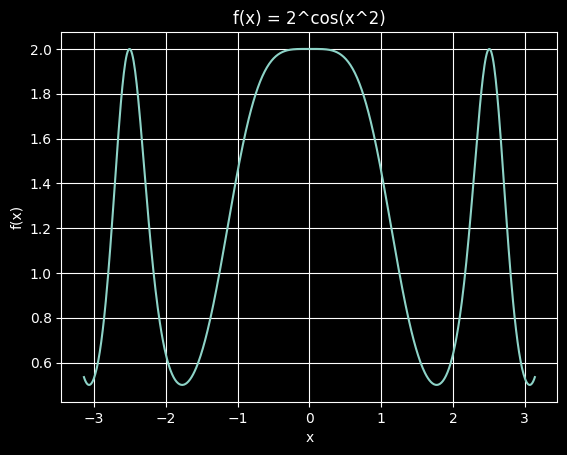

In [ ]:
def func(x):
    return 2 ** torch.cos(x ** 2)
    mse_loss = criterion(outputs.squeeze(), y)
    loss = mse_loss  # No regularización
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Guardar la pérdida
    scheduler.step(loss)
    if (epoch+1) % 200 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss.item():.6f} | LR: {optimizer.param_groups[0]['lr']:.6e}")

plt.figure(figsize=(7,4))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.xlabel('Épocas')
plt.ylabel('MSE Loss')
plt.title('Pérdida vs Épocas (LR adaptativo)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Predicción y gráfica
with torch.no_grad():
    y_pred = model(X_poly).squeeze().cpu().numpy()

plt.figure(figsize=(7,4))
plt.plot(x.cpu().numpy(), y.cpu().numpy(), label='f(x) = 2cos(x^2)', color='blue')
plt.plot(x.cpu().numpy(), y_pred, label='Aproximación polinómica (LR adaptativo)', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación polinómica vs función original (LR adaptativo)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico del error logarítmico
error = y.cpu().numpy() - y_pred
plt.figure(figsize=(7,4))
plt.plot(x.cpu().numpy(), error, label='Error', color='green')
plt.xlabel('x')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Error de aproximación (LR adaptativo)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/1000000 Loss: 477560064.000000 | LR: 1.000000e+00
Epoch 200/1000000 Loss: 631.180908 | LR: 1.000000e+00
Epoch 400/1000000 Loss: 105.951965 | LR: 1.000000e+00
Epoch 600/1000000 Loss: 90.660889 | LR: 1.000000e+00
Epoch 800/1000000 Loss: 76.155975 | LR: 1.000000e+00
Epoch 1000/1000000 Loss: 62.124405 | LR: 1.000000e+00
Epoch 1200/1000000 Loss: 49.383244 | LR: 1.000000e+00
Epoch 1400/1000000 Loss: 38.440960 | LR: 1.000000e+00
Epoch 1600/1000000 Loss: 29.521004 | LR: 1.000000e+00
Epoch 1800/1000000 Loss: 22.605801 | LR: 1.000000e+00
Epoch 2000/1000000 Loss: 114.825310 | LR: 1.000000e+00
Epoch 2200/1000000 Loss: 17.542572 | LR: 1.000000e-01
Epoch 2400/1000000 Loss: 17.157009 | LR: 1.000000e-01
Epoch 2600/1000000 Loss: 16.745365 | LR: 1.000000e-01
Epoch 2800/1000000 Loss: 16.308897 | LR: 1.000000e-01
Epoch 3000/1000000 Loss: 15.849192 | LR: 1.000000e-01
Epoch 3200/1000000 Loss: 15.368481 | LR: 1.000000e-01
Epoch 3400/1000000 Loss: 14.869481 | LR: 1.000000e-01
Epoch 3600/1000000 Loss: 

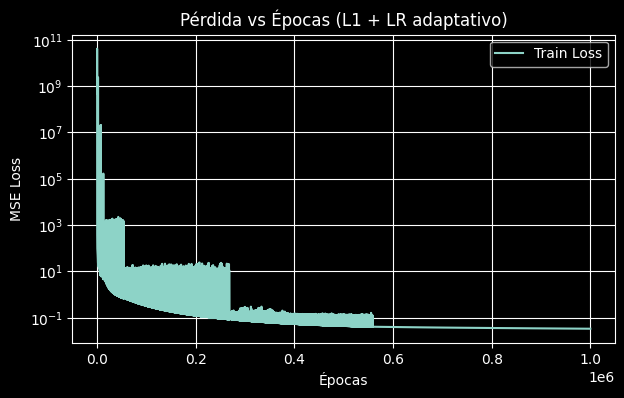

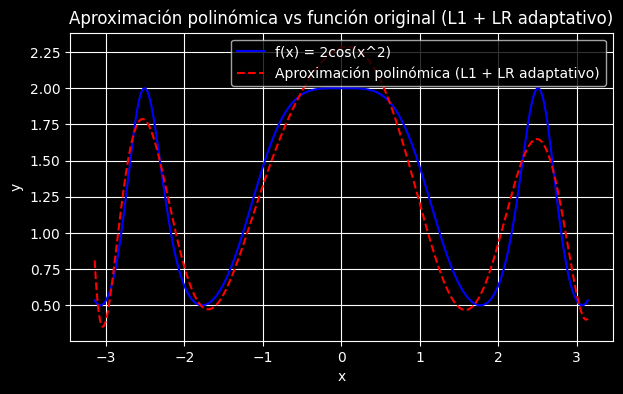

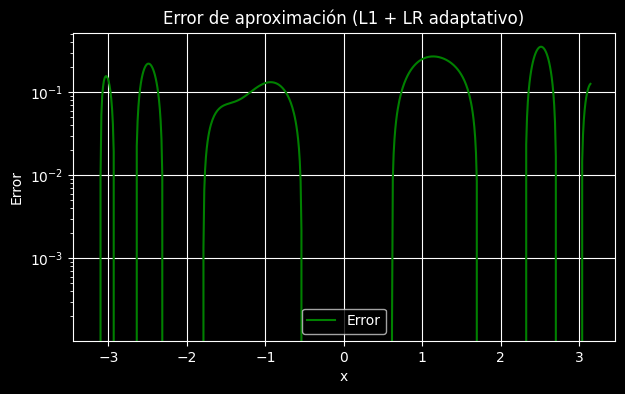

In [50]:
# Datos
grado = 12
X_poly = torch.vstack([x**i for i in range(grado+1)]).T.to(device)

# Modelo lineal
model = nn.Linear(grado+1, 1).to(device)
initial_lr = 1
optimizer = optim.Adam(model.parameters(), lr=initial_lr)
criterion = nn.MSELoss()

# Scheduler para learning rate adaptativo (ReduceLROnPlateau)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=200,  min_lr=1e-7, verbose=True)

num_epochs = 1000000  # Menos épocas por eficiencia
l1_lambda = 0.001
train_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_poly)
    mse_loss = criterion(outputs.squeeze(), y)
    l1_loss = 0
    for param in model.parameters():
        l1_loss += torch.sum(torch.abs(param))
    loss = mse_loss + l1_lambda * l1_loss
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Guardar la pérdida
    scheduler.step(loss)
    if (epoch+1) % 200 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss.item():.6f} | LR: {optimizer.param_groups[0]['lr']:.6e}")

plt.figure(figsize=(7,4))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.xlabel('Épocas')
plt.ylabel('MSE Loss')
plt.title('Pérdida vs Épocas (L1 + LR adaptativo)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Predicción y gráfica
with torch.no_grad():
    y_pred = model(X_poly).squeeze().cpu().numpy()

plt.figure(figsize=(7,4))
plt.plot(x.cpu().numpy(), y.cpu().numpy(), label='f(x) = 2cos(x^2)', color='blue')
plt.plot(x.cpu().numpy(), y_pred, label='Aproximación polinómica (L1 + LR adaptativo)', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación polinómica vs función original (L1 + LR adaptativo)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico del error logarítmico
error = y.cpu().numpy() - y_pred
plt.figure(figsize=(7,4))
plt.plot(x.cpu().numpy(), error, label='Error', color='green')
plt.xlabel('x')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Error de aproximación (L1 + LR adaptativo)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/1000000 Loss: 223597088.000000 | LR: 1.000000e+00
Epoch 200/1000000 Loss: 4358.911133 | LR: 1.000000e+00
Epoch 400/1000000 Loss: 523.886780 | LR: 1.000000e+00
Epoch 600/1000000 Loss: 451.671387 | LR: 1.000000e+00
Epoch 800/1000000 Loss: 400.581879 | LR: 1.000000e+00
Epoch 1000/1000000 Loss: 348.386200 | LR: 1.000000e+00
Epoch 1200/1000000 Loss: 297.714478 | LR: 1.000000e+00
Epoch 1400/1000000 Loss: 250.566788 | LR: 1.000000e+00
Epoch 1600/1000000 Loss: 648917.375000 | LR: 1.000000e+00
Epoch 1800/1000000 Loss: 172.072601 | LR: 1.000000e+00
Epoch 2000/1000000 Loss: 10723530.000000 | LR: 1.000000e+00
Epoch 2200/1000000 Loss: 121.978325 | LR: 1.000000e+00
Epoch 2400/1000000 Loss: 29595574.000000 | LR: 1.000000e+00
Epoch 2600/1000000 Loss: 92.257149 | LR: 1.000000e-01
Epoch 2800/1000000 Loss: 89.590820 | LR: 1.000000e-01
Epoch 3000/1000000 Loss: 88.220688 | LR: 1.000000e-01
Epoch 3200/1000000 Loss: 86.740448 | LR: 1.000000e-01
Epoch 3400/1000000 Loss: 85.147591 | LR: 1.000000e-01
Ep

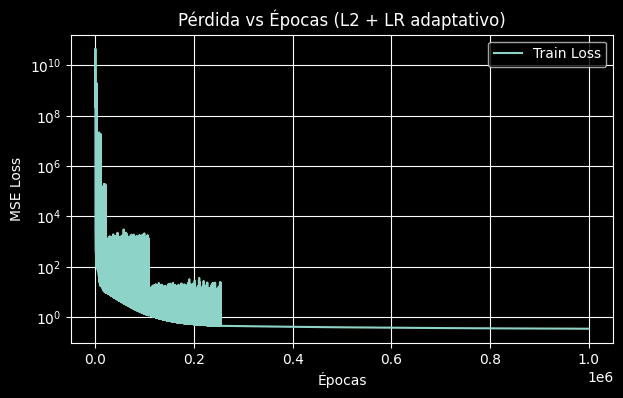

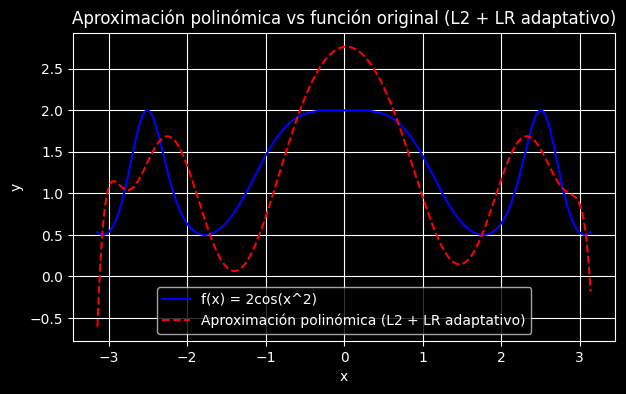

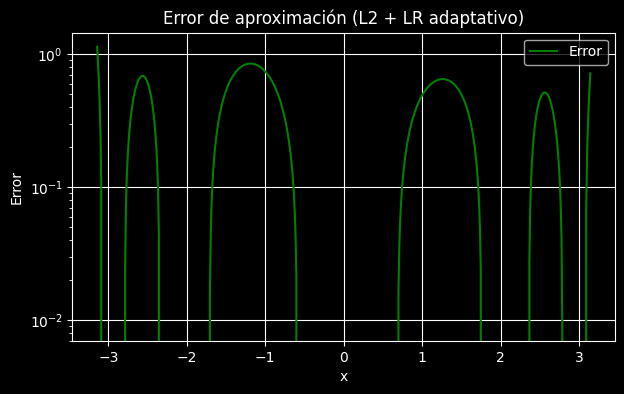

In [52]:
# Datos
grado = 12
X_poly = torch.vstack([x**i for i in range(grado+1)]).T.to(device)

# Modelo lineal
model = nn.Linear(grado+1, 1).to(device)
initial_lr = 1
optimizer = optim.Adam(model.parameters(), lr=initial_lr)
criterion = nn.MSELoss()

# Scheduler para learning rate adaptativo (ReduceLROnPlateau)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=200,  min_lr=1e-7, verbose=True)

num_epochs = 1000000  # Menos épocas por eficiencia
l2_lambda = 0.01
train_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_poly)
    mse_loss = criterion(outputs.squeeze(), y)
    l2_loss = 0
    for param in model.parameters():
        l2_loss += torch.sum(param ** 2)
    loss = mse_loss + l2_lambda * l2_loss
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Guardar la pérdida
    scheduler.step(loss)
    if (epoch+1) % 200 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss.item():.6f} | LR: {optimizer.param_groups[0]['lr']:.6e}")

plt.figure(figsize=(7,4))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.xlabel('Épocas')
plt.ylabel('MSE Loss')
plt.title('Pérdida vs Épocas (L2 + LR adaptativo)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Predicción y gráfica
with torch.no_grad():
    y_pred = model(X_poly).squeeze().cpu().numpy()

plt.figure(figsize=(7,4))
plt.plot(x.cpu().numpy(), y.cpu().numpy(), label='f(x) = 2cos(x^2)', color='blue')
plt.plot(x.cpu().numpy(), y_pred, label='Aproximación polinómica (L2 + LR adaptativo)', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación polinómica vs función original (L2 + LR adaptativo)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico del error logarítmico
error = y.cpu().numpy() - y_pred
plt.figure(figsize=(7,4))
plt.plot(x.cpu().numpy(), error, label='Error', color='green')
plt.xlabel('x')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Error de aproximación (L2 + LR adaptativo)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 1.3105e+00, -1.4668e-01, -9.7835e-01,  3.0481e-01, -8.0408e-01,
         -1.7724e-01,  2.5342e-01,  4.2097e-02,  8.1024e-03, -4.3751e-03,
         -6.2883e-03,  1.6530e-04,  3.8190e-04]], device='cuda:0',
       requires_grad=True), Parameter containing:
tensor([0.9700], device='cuda:0', requires_grad=True)]


## Problema 2

Considere un modelo DNN (demasiado profundo o ancho) con dropout y repita el problema 1.

Pista: puede ser útil leer la documentación de `torch.nn.Dropout`. También son relevantes los comandos `model.train()` y `model.eval()`.

Source: https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models/


In [389]:
def my_func(a, b, n_samples, noise_var):
    x = np.linspace(a, b, n_samples)
    y = 2**np.cos(x**2) + np.random.normal(0, noise_var, n_samples)
    return x.reshape(-1, 1), y.reshape(-1, 1)

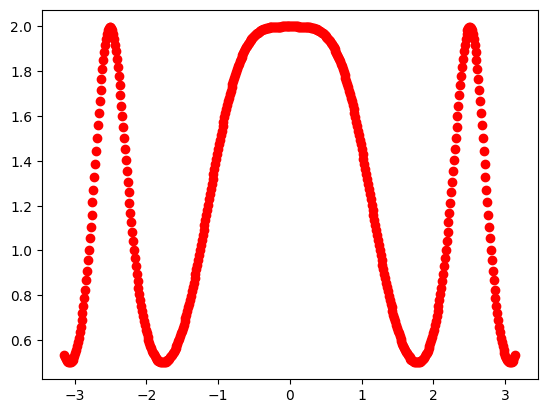

In [430]:
# Use a range for x values
X_np, y_np = my_func(-np.pi, np.pi, 500, 0.0)

#X_np, y_np = my_func(-np.pi, np.pi, 500, 0.1)
#X_np, y_np = my_func(-np.pi, np.pi, 500, 0.5)

plt.plot(X_np, y_np, 'ro')
plt.show()

In [431]:
# Convertir datos a tensores y mover a dispositivo (entrenamiento completo, sin validación)
X = torch.from_numpy(X_np.astype(np.float32)).to(device)
y = torch.from_numpy(y_np.astype(np.float32)).to(device)
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape
input_size = n_features
output_size = 1

print(f"Samples: {n_samples}, Features: {n_features}")

Samples: 500, Features: 1


In [432]:
class DNN(nn.Module):
    def __init__(self, n, dropout_p=0.0):
        super(DNN, self).__init__()
        
        # Número de capas (L = número de elementos en n - 1)
        self.L = len(n) - 1
        
        # Probabilidad de dropout (0.0 = sin dropout)
        self.dropout_p = float(dropout_p)
        
        # Función de activación: guardamos la clase, instanciamos por capa
        actcls = nn.ReLU

        layers = list()
        # Construye las capas ocultas con su función de activación
        for i in range(self.L - 1):
            layers.append((f'l_{i+1}', nn.Linear(n[i], n[i+1])))  # Capa lineal
            layers.append((f'actfunc_{i+1}', actcls()))          # Activación (nueva instancia por capa)
            # Añadir dropout si se especificó una probabilidad > 0
            if self.dropout_p > 0.0:
                layers.append((f'dropout_{i+1}', nn.Dropout(p=self.dropout_p)))
        
        # Última capa (sin activación)
        layers.append((f'l_{self.L}', nn.Linear(n[-2], n[-1])))
        self.layers = nn.Sequential(OrderedDict(layers))  # Secuencia ordenada de capas
        
    def forward(self, x):
        return self.layers(x)
    

# Instanciar modelo con dropout moderado y tamaños más pequeños para estabilidad
model = DNN(n = [input_size, 1000, output_size], dropout_p=0.2).to(device)
print(model)

DNN(
  (layers): Sequential(
    (l_1): Linear(in_features=1, out_features=1000, bias=True)
    (actfunc_1): ReLU()
    (dropout_1): Dropout(p=0.2, inplace=False)
    (l_2): Linear(in_features=1000, out_features=1, bias=True)
  )
)


In [433]:
learning_rate = 0.01  # LR más razonable para Adam
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
# Scheduler para learning rate adaptativo: paciencia más pequeña para pruebas rápidas
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=100, min_lr=1e-12, verbose=True)

Epoch [1/1000], Train Loss: 2.123835, LR: 1.000000e-02
Epoch [100/1000], Train Loss: 0.176549, LR: 1.000000e-02
Epoch [100/1000], Train Loss: 0.176549, LR: 1.000000e-02
Epoch [200/1000], Train Loss: 0.120045, LR: 1.000000e-02
Epoch [200/1000], Train Loss: 0.120045, LR: 1.000000e-02
Epoch [300/1000], Train Loss: 0.081747, LR: 1.000000e-02
Epoch [300/1000], Train Loss: 0.081747, LR: 1.000000e-02
Epoch [400/1000], Train Loss: 0.054689, LR: 1.000000e-02
Epoch [400/1000], Train Loss: 0.054689, LR: 1.000000e-02
Epoch [500/1000], Train Loss: 0.052196, LR: 1.000000e-02
Epoch [500/1000], Train Loss: 0.052196, LR: 1.000000e-02
Epoch [600/1000], Train Loss: 0.057159, LR: 1.000000e-02
Epoch [600/1000], Train Loss: 0.057159, LR: 1.000000e-02
Epoch [700/1000], Train Loss: 0.046450, LR: 1.000000e-03
Epoch [700/1000], Train Loss: 0.046450, LR: 1.000000e-03
Epoch [800/1000], Train Loss: 0.043406, LR: 1.000000e-04
Epoch [800/1000], Train Loss: 0.043406, LR: 1.000000e-04
Epoch [900/1000], Train Loss: 0.0

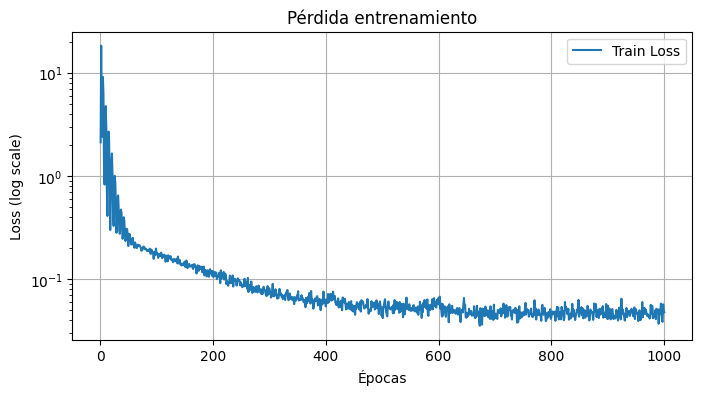

In [434]:
MaxIters = 1000
train_losses = []

for epoch in range(1, MaxIters+1):
    # Entrenamiento (forward + backward)
    model.train()
    optimizer.zero_grad()
    y_hat = model(X)
    train_loss = criterion(y_hat, y)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())

    # Obtener el learning rate actual
    current_lr = optimizer.param_groups[0]['lr']

    # Imprimir periódicamente
    if epoch % 100 == 0 or epoch == 1:
        print(f"Epoch [{epoch}/{MaxIters}], Train Loss: {train_loss.item():.6f}, LR: {current_lr:.6e}")

    # Scheduler se actualiza con la pérdida de entrenamiento (no hay validación)
    scheduler.step(train_loss.item())

# Gráficas
plt.figure(figsize=(8,4))
plt.plot(range(1, MaxIters+1), train_losses, label='Train Loss')
plt.yscale('log')
plt.xlabel('Épocas')
plt.ylabel('Loss (log scale)')
plt.title('Pérdida entrenamiento')
plt.grid(True)
plt.legend()
plt.show()

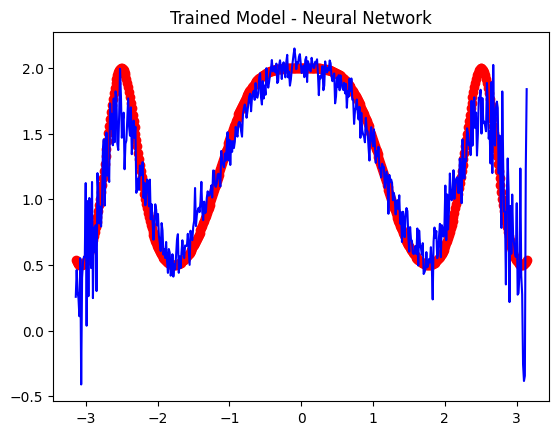

In [435]:
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_hat.cpu().detach().numpy(), 'b')
plt.title('Trained Model - Neural Network')
plt.show()

In [436]:
def Accuracy(y, y_hat):
    mse = torch.mean((y - y_hat)**2)
    return 1 / (1 + mse)

# Imprime metricas
print(f'Final Loss: {Err.item():.4f}')
print(f'Final Accuracy: {Accuracy(y, y_hat):.4f}')
print(f'RMSE: {torch.sqrt(torch.mean((y - y_hat)**2)).item():.4f}')


Final Loss: 0.3286
Final Accuracy: 0.9543
RMSE: 0.2188


Observo que el dropout provoca una prediccion con mucho ruido a comparación de no usarlo, además retraza la convergencia. Sin embargo, el modelo con dropout generaliza mejor y no sobreajusta tanto como el modelo sin dropout.

## Problema 3

Considere el conjunto de datos de [2] y haga un script en PyTorch para resolver el problema de predicción de precios asociado. Para esta tarea debe considerar un modelo DNN. Comience con una topología de red que considere lo suficientemente compleja. Luego revise si hay problemas de sobreajuste/subajuste y actúe en consecuencia.

A continuación, intente responder cuáles son las características más importantes que determinan el precio. ¿Cuáles son las menos relevantes? Anote todas las suposiciones y las operaciones de preprocesamiento de datos que realice. Muestre las precisiones (accuracies) de entrenamiento/prueba que obtenga y discuta sus hallazgos.

Source: https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021


In [2]:
import polars as pl
import os
import kagglehub

# Descargar (o devolver) el path donde está el dataset
path = kagglehub.dataset_download("mrdaniilak/russia-real-estate-2021")
csv_files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]
if len(csv_files) == 0:
    raise FileNotFoundError("No se encontró ningún archivo CSV en el directorio descargado.")
csv_file = os.path.join(path, csv_files[0])

df = pl.read_csv(
    csv_file,
    separator=';',           
    ignore_errors=True,
    null_values=["", "NA", "NaN", "NULL", "None", "none"],
    infer_schema_length=200,
    try_parse_dates=True,
    encoding='utf8',
    quote_char='"'
)

print('shape:', df.shape)
df

shape: (11358150, 15)


date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
date,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64
2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000,null,66,1632918
2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000,null,1,null
2021-01-01,10700000,4,13,3,85.0,12.0,55.54006,37.725112,3,0,142701,242543,50,681306
2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000,null,1,null
2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960,439378,23,1730985
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2021-12-31,6099000,4,9,3,65.0,0.0,56.041539,92.753133,0,0,660030,581436,24,857003
2021-12-31,2490000,1,10,2,56.9,0.0,55.169949,61.51921,0,0,454079,274414,74,1820769
2021-12-31,850000,2,2,2,37.0,5.0,55.946206,43.088179,0,0,606101,190983,52,958329


In [3]:
df = df.drop('house_id', 'date')

In [4]:
import polars as pl

# imprime el tamaño
print('shape:', df.shape)

# Contar duplicados
num_duplicados = df.height - df.unique().height
print("Duplicados:", num_duplicados)

# Eliminar duplicados
df = df.unique()

# imprime el tamaño después de eliminar duplicados
print('shape after removing duplicates:', df.shape)

shape: (11358150, 13)
Duplicados: 2169660
Duplicados: 2169660
shape after removing duplicates: (9188490, 13)
shape after removing duplicates: (9188490, 13)


Por temas de poder de computo tomare una muestra de los datos probare con el 70 % de los datos.

In [5]:
#
df = df.sample(fraction=0.6, with_replacement=False, shuffle=True)
print('shape after sampling:', df.shape)

shape after sampling: (5513094, 13)


In [6]:
def unique_summary_polars(df: pl.DataFrame, max_preview: int = 200, show: bool = True) -> pl.DataFrame:
    """Return a Polars DataFrame summarizing unique values per column.

    Args:
        df: Polars DataFrame to summarize.
        max_preview: max characters for the preview column (truncated if longer).
        show: if True, print the summary with full table display.

    Returns:
        Polars DataFrame with columns: name_column, num_unique, unique_list (JSON string), unique_list_preview.
    """
    import json

    rows_name = []
    rows_count = []
    rows_list = []

    for col in df.columns:
        # Obtener valores únicos sin nulos como lista
        uniques = df[col].drop_nulls().unique().to_list()
        rows_name.append(col)
        rows_count.append(len(uniques))
        rows_list.append(uniques)

    # Convertir las listas únicas a JSON (strings) para evitar problemas de tipos mixtos en Polars
    rows_list_str = [json.dumps(u, default=str, ensure_ascii=False) for u in rows_list]
    # Crear una versión truncada para vista previa (opcional)
    rows_list_preview = [s if len(s) <= max_preview else s[:max_preview] + '... (truncated)'
                         for s in rows_list_str]

    summary = pl.DataFrame({
        'name_column': rows_name,
        'num_unique': rows_count,
        'unique_list': rows_list_str,
        'unique_list_preview': rows_list_preview
    })

    if show:
        with pl.Config(tbl_cols=-1, tbl_rows=-1):
            print(summary)

    return summary

summary = unique_summary_polars(df)

shape: (13, 4)
┌───────────────┬────────────┬─────────────────────────────────┬─────────────────────────────────┐
│ name_column   ┆ num_unique ┆ unique_list                     ┆ unique_list_preview             │
│ ---           ┆ ---        ┆ ---                             ┆ ---                             │
│ str           ┆ i64        ┆ str                             ┆ str                             │
╞═══════════════╪════════════╪═════════════════════════════════╪═════════════════════════════════╡
│ price         ┆ 464905     ┆ [0, 1, 2, 5, 10, 12, 18, 40, 6… ┆ [0, 1, 2, 5, 10, 12, 18, 40, 6… │
│ level         ┆ 51         ┆ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,… ┆ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,… │
│ levels        ┆ 51         ┆ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,… ┆ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,… │
│ rooms         ┆ 10         ┆ [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9… ┆ [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9… │
│ area          ┆ 14713      ┆ [1.0, 1.4, 1.5, 2.0, 2.1, 2.5,… ┆ [1.0, 1.4, 1.5, 2.0, 2.1, 2.5

In [32]:
import polars as pl
import numpy as np

# Convertimos a numpy solo para cálculo KNN
X = df.select(df.columns).fill_null(0.0).to_numpy()

# Imputación para postal_code
idx_postal = df.columns.index('postal_code')
missing_postal = np.where(np.isnan(X[:, idx_postal]))[0]
valid_postal = np.where(~np.isnan(X[:, idx_postal]))[0]

for i in missing_postal:
    x = X[i]
    dists = np.linalg.norm(X[valid_postal, :] - x, axis=1)
    knn_idx = np.argsort(dists)[:5]
    X[i, idx_postal] = np.mean(X[valid_postal[knn_idx], idx_postal])

# Imputación para street_id
idx_street = df.columns.index('street_id')
missing_street = np.where(np.isnan(X[:, idx_street]))[0]
valid_street = np.where(~np.isnan(X[:, idx_street]))[0]

for i in missing_street:
    x = X[i]
    dists = np.linalg.norm(X[valid_street, :] - x, axis=1)
    knn_idx = np.argsort(dists)[:5]
    X[i, idx_street] = np.mean(X[valid_street[knn_idx], idx_street])

# Reemplazamos las columnas imputadas
df = df.with_columns([
    pl.Series('postal_code', X[:, idx_postal]),
    pl.Series('street_id', X[:, idx_street])
])

with pl.Config(tbl_cols=6, tbl_rows=6):
    print(df.select(['postal_code', 'street_id']).head(10))


shape: (10, 2)
┌─────────────┬───────────┐
│ postal_code ┆ street_id │
│ ---         ┆ ---       │
│ f64         ┆ f64       │
╞═════════════╪═══════════╡
│ 690000.0    ┆ 0.0       │
│ 188666.0    ┆ 0.0       │
│ 656065.0    ┆ 0.0       │
│ …           ┆ …         │
│ 603022.0    ┆ 438679.0  │
│ 190000.0    ┆ 0.0       │
│ 195252.0    ┆ 357700.0  │
└─────────────┴───────────┘


In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

features = df.drop('price')
target = df.select('price')

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Escalar características
scaler_train = MaxAbsScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_train.transform(X_test)
scaler_test = MaxAbsScaler()
y_train_scaled = scaler_test.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled  = scaler_test.transform(y_test.to_numpy().reshape(-1, 1))

In [40]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_scaled = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)
y_test_scaled = torch.tensor(y_test_scaled, dtype=torch.float32).to(device)


C:\Users\sergi\AppData\Local\Temp\ipykernel_10624\4014888185.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
C:\Users\sergi\AppData\Local\Temp\ipykernel_10624\4014888185.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32).to(device)


In [43]:
n_samples, n_features = X_train.shape
input_size = n_features
output_size = 1

print(f"Samples: {n_samples}, Features: {n_features}")

class DNN(nn.Module):
    def __init__(self, n, dropout_p=0.0):
        super(DNN, self).__init__()
        
        # Número de capas (L = número de elementos en n - 1)
        self.L = len(n) - 1
        
        # Probabilidad de dropout (0.0 = sin dropout)
        self.dropout_p = float(dropout_p)
        
        # Función de activación: guardamos la clase, instanciamos por capa
        actcls = nn.ReLU

        layers = list()
        # Construye las capas ocultas con su función de activación
        for i in range(self.L - 1):
            layers.append((f'l_{i+1}', nn.Linear(n[i], n[i+1])))  # Capa lineal
            layers.append((f'actfunc_{i+1}', actcls()))          # Activación (nueva instancia por capa)
            # Añadir dropout si se especificó una probabilidad > 0
            if self.dropout_p > 0.0:
                layers.append((f'dropout_{i+1}', nn.Dropout(p=self.dropout_p)))
        
        # Última capa (sin activación)
        layers.append((f'l_{self.L}', nn.Linear(n[-2], n[-1])))
        self.layers = nn.Sequential(OrderedDict(layers))  # Secuencia ordenada de capas
        
    def forward(self, x):
        return self.layers(x)
    

# Instanciar modelo con dropout moderado y tamaños más pequeños para estabilidad
model = DNN(n = [input_size, 140, 140, 60, output_size], dropout_p=0.3).to(device)
print(model)

Samples: 4410475, Features: 12
DNN(
  (layers): Sequential(
    (l_1): Linear(in_features=12, out_features=140, bias=True)
    (actfunc_1): ReLU()
    (dropout_1): Dropout(p=0.3, inplace=False)
    (l_2): Linear(in_features=140, out_features=140, bias=True)
    (actfunc_2): ReLU()
    (dropout_2): Dropout(p=0.3, inplace=False)
    (l_3): Linear(in_features=140, out_features=60, bias=True)
    (actfunc_3): ReLU()
    (dropout_3): Dropout(p=0.3, inplace=False)
    (l_4): Linear(in_features=60, out_features=1, bias=True)
  )
)


In [44]:
learning_rate = 0.1 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
# Scheduler para learning rate adaptativo: paciencia más pequeña para pruebas rápidas
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=25, min_lr=1e-12, verbose=True)

c:\Users\sergi\Documents\DNN\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Training: 100%|██████████| 1/1 [00:07<00:00,  7.35s/it]



Epoch 1: Train=2.3354e-07, Test=5.5509e-09


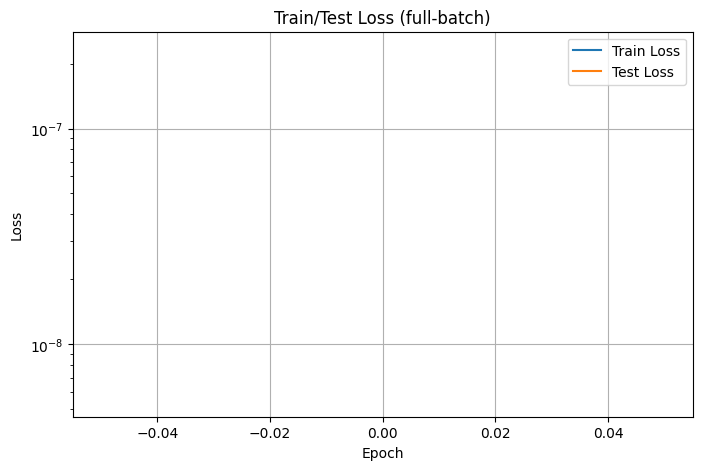

Final Train RMSE: 307137792.0000 | Final Test RMSE: 47351560.0000


In [47]:

from tqdm import tqdm

import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

# Activar aceleraciones para GPU RTX 4060
torch.set_float32_matmul_precision("high")

def evaluate(model, X, y, criterion):
    model.eval()
    with torch.no_grad():
        preds = model(X)
        return criterion(preds, y).item()

@torch.no_grad()
def compute_rmse(scaler, y_true, y_pred):
    """Evalúa el RMSE en unidades originales (sin gradientes)."""
    y_true_inv = scaler.inverse_transform(y_true)
    y_pred_inv = scaler.inverse_transform(y_pred)
    return np.sqrt(np.mean((y_pred_inv - y_true_inv) ** 2))


def train_regression_fullbatch(model, optimizer, criterion,
                               X_train, y_train, X_test, y_test,
                               num_epochs=100, print_every=10,
                               scheduler=None, scaler=None, device='cuda'):

    # Intentar compilar el modelo con TorchDynamo, fallback a eager si falla
    import torch._dynamo
    torch._dynamo.config.suppress_errors = True
    try:
        model = torch.compile(model)
    except Exception as e:
        print("⚠️ No se pudo compilar el modelo. Se usará modo eager.")
    
    model.to(device)
    X_train, y_train, X_test, y_test = [
        t.to(device, non_blocking=True) for t in (X_train, y_train, X_test, y_test)
    ]

    train_losses, test_losses = [], []

    for epoch in trange(1, num_epochs + 1, desc="Training"):
        model.train()
        optimizer.zero_grad(set_to_none=True)
        preds = model(X_train)
        loss = criterion(preds, y_train)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        train_loss = loss.item()
        test_loss = evaluate(model, X_test, y_test, criterion)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if (epoch % print_every == 0) or (epoch == num_epochs):
            tqdm.write(f"Epoch {epoch}: Train={train_loss:.4e}, Test={test_loss:.4e}")

        if scheduler is not None:
            scheduler.step(test_loss)

    # Gráfica de pérdidas
    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Train/Test Loss (full-batch)')
    plt.legend()
    plt.grid(True)
    plt.show()

    if scaler is not None:
        y_train_pred = model(X_train).detach().cpu().numpy()
        y_test_pred = model(X_test).detach().cpu().numpy()
        y_train_np = y_train.cpu().numpy()
        y_test_np = y_test.cpu().numpy()

        train_rmse = compute_rmse(scaler, y_train_np, y_train_pred)
        test_rmse = compute_rmse(scaler, y_test_np, y_test_pred)
        print(f"Final Train RMSE: {train_rmse:.4f} | Final Test RMSE: {test_rmse:.4f}")
    return train_losses, test_losses


train_losses, test_losses = train_regression_fullbatch(
    model, optimizer, criterion, X_train, y_train_scaled, X_test, y_test_scaled,
    num_epochs=1, print_every=1, scheduler=scheduler, device=device, scaler=scaler_test
)


In [48]:


# Extraer pesos de la primera capa lineal
first_layer = None
for name, module in model.named_modules():
    if isinstance(module, nn.Linear):
        first_layer = module
        break

if first_layer is not None:
    # Tomar el vector de pesos (shape: [output_size, input_size])
    weights = first_layer.weight.detach().cpu().numpy().squeeze()
    # Si output_size > 1, tomar la norma o el promedio por feature
    if weights.ndim > 1:
        weights = np.mean(np.abs(weights), axis=0)
    else:
        weights = np.abs(weights)
    # Asociar con nombres de columnas
    feature_names = features.columns
    importance = sorted(zip(feature_names, weights), key=lambda x: -x[1])
    print("Importancia de características (mayor a menor):")
    for name, imp in importance:
        print(f"{name:15s}: {imp:.4f}")
else:
    print("No se encontró la primera capa lineal en el modelo.")

Importancia de características (mayor a menor):
area           : 0.5903
geo_lat        : 0.5883
geo_lon        : 0.5875
levels         : 0.5854
id_region      : 0.5849
level          : 0.5791
postal_code    : 0.5734
street_id      : 0.5633
building_type  : 0.5627
rooms          : 0.5601
object_type    : 0.5359
kitchen_area   : 0.4699


Se observa en primer lugar que el nivel de underfitting es alto, por lo que se decide aumentar la complejidad del modelo. con dosm capasa ocultas con 120 neuronas, este fuer el resultado:

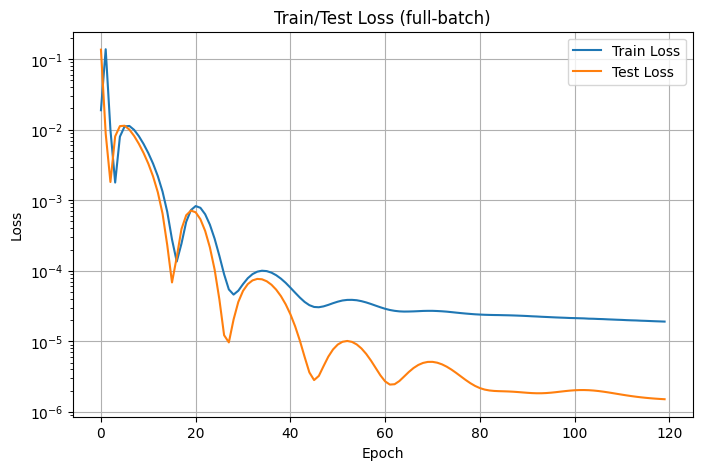

Agregando 60 neuronas con dropout de 0.1 se obtiene:

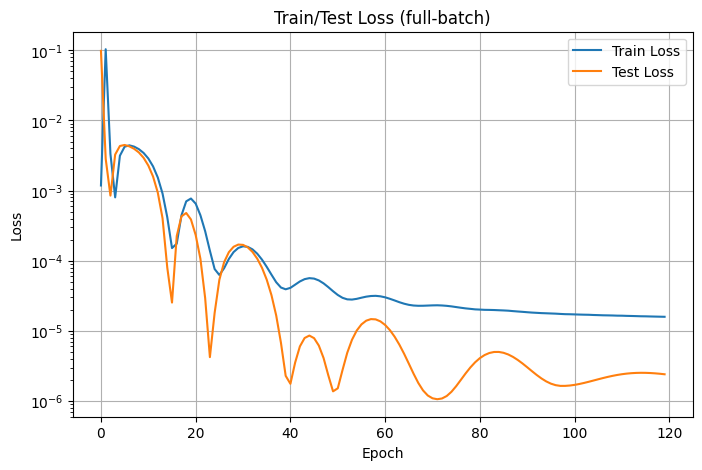

quiza con un dropout de 0.3 se obtenga un resultado más estable. Sigue sucediento un underfitting

Con una red más compleja con 3 capas ocultas y 140, 140 y 60 neuronas respectivamente se obtiene:

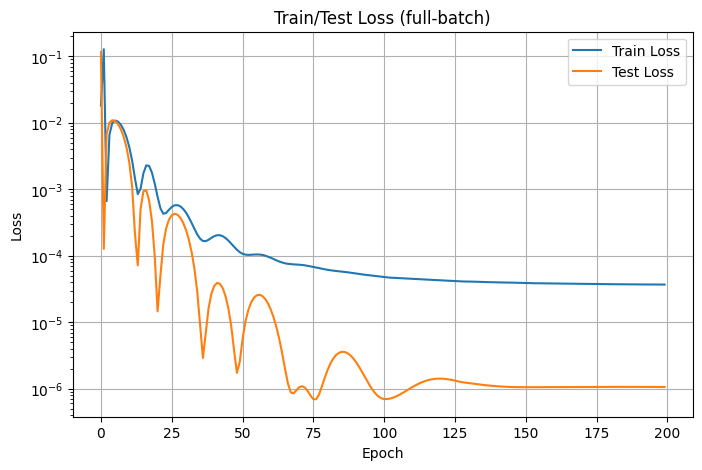

Con un dropout de 0.3 se obtiene y un learning rate más alto de 0.1 se logro mantener el aprendizaje de manera más extendida aunque despues hubo otro underfitting:

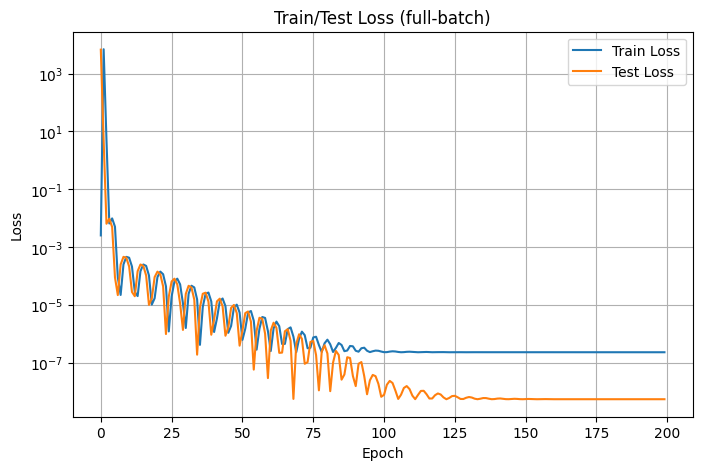

## Problema 4

Considere el conjunto de datos de [4] y realice la clasificación de imágenes de dígitos usando un modelo DNN. Cada neurona en la capa de entrada corresponde a la intensidad de un píxel en una imagen en escala de grises. Muestre las precisiones (accuracies) de entrenamiento/prueba que obtenga y discuta sus hallazgos. Luego revise si hay problemas de sobreajuste/subajuste y actúe en consecuencia si es necesario. Muestre en una imagen cuáles píxeles son los más significativos en la tarea de clasificación.

Source: https://www.kaggle.com/datasets/hojjatk/mnist-dataset


In [13]:
import torch
import torchvision
from collections import OrderedDict
import torch.nn as nn
import torchvision.transforms as transforms


dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dev

device(type='cuda')

In [46]:
# Hyperparams
ne = 5
bs = 100
lr = 1e-3

In [47]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


In [48]:
# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

In [66]:
class DNN(nn.Module):
    def __init__(self, n, dropout_p=0.0):
        super(DNN, self).__init__()
        
        # Número de capas (L = número de elementos en n - 1)
        self.L = len(n) - 1
        
        # Probabilidad de dropout (0.0 = sin dropout)
        self.dropout_p = float(dropout_p)
        
        # Función de activación: guardamos la clase, instanciamos por capa
        actcls = nn.ReLU

        layers = list()
        # Construye las capas ocultas con su función de activación
        for i in range(self.L - 1):
            layers.append((f'l_{i+1}', nn.Linear(n[i], n[i+1])))  # Capa lineal
            layers.append((f'actfunc_{i+1}', actcls()))          # Activación (nueva instancia por capa)
            # Añadir dropout si se especificó una probabilidad > 0
            if self.dropout_p > 0.0:
                layers.append((f'dropout_{i+1}', nn.Dropout(p=self.dropout_p)))
        
        # Última capa (sin activación)
        layers.append((f'l_{self.L}', nn.Linear(n[-2], n[-1])))
        self.layers = nn.Sequential(OrderedDict(layers))  # Secuencia ordenada de capas
        
    def forward(self, x):
        return self.layers(x)
    



In [67]:
# Creatiing NN model
input_size = 28*28
output_size = 10

model = DNN(n = [input_size, 100, output_size], dropout_p=0.2).to(dev)

In [68]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Epoch [1/5], Step [100/600], Loss: 0.5246
Epoch [1/5], Step [200/600], Loss: 0.4939
Epoch [1/5], Step [300/600], Loss: 0.4936
Epoch [1/5], Step [400/600], Loss: 0.3370
Epoch [1/5], Step [500/600], Loss: 0.2651
Epoch [1/5], Step [600/600], Loss: 0.2724
Epoch [2/5], Step [100/600], Loss: 0.2559
Epoch [2/5], Step [200/600], Loss: 0.2179
Epoch [2/5], Step [300/600], Loss: 0.1990
Epoch [2/5], Step [400/600], Loss: 0.2086
Epoch [2/5], Step [500/600], Loss: 0.2259
Epoch [2/5], Step [600/600], Loss: 0.1629
Epoch [3/5], Step [100/600], Loss: 0.2473
Epoch [3/5], Step [200/600], Loss: 0.2229
Epoch [3/5], Step [300/600], Loss: 0.1147
Epoch [3/5], Step [400/600], Loss: 0.1311
Epoch [3/5], Step [500/600], Loss: 0.2513
Epoch [3/5], Step [600/600], Loss: 0.1165
Epoch [4/5], Step [100/600], Loss: 0.1272
Epoch [4/5], Step [200/600], Loss: 0.1383
Epoch [4/5], Step [300/600], Loss: 0.1093
Epoch [4/5], Step [400/600], Loss: 0.0899
Epoch [4/5], Step [500/600], Loss: 0.0825
Epoch [4/5], Step [600/600], Loss:

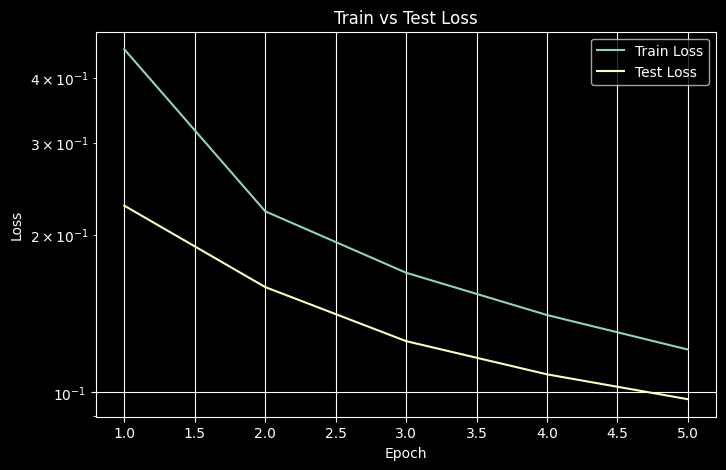

In [69]:
# Training Loop with loss tracking
train_losses = []
test_losses = []
nb = len(train_loader)

for epoch in range(ne):
    running_loss = 0.0
    for batch, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(dev)
        labels = labels.to(dev)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (batch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{ne}], Step [{batch+1}/{nb}], Loss: {loss.item():.4f}')
    
    # Promedio de loss de entrenamiento por época
    train_losses.append(running_loss / nb)
    

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, input_size).to(dev)
            labels = labels.to(dev)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_loader))
    model.train()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses)+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# Model evaluation
def my_eval(model, data_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in data_loader:
            images = images.reshape(-1, 28*28).to(dev)
            labels = labels.to(dev)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [71]:
# Evaluate the model
train_accuracy = my_eval(model, train_loader)
test_accuracy = my_eval(model, test_loader)
print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

Train Accuracy: 97.73%
Test Accuracy: 97.04%


Parece que sin dropout el modelo sobreajusta, con dropout el modelo generaliza mejor y no sobreajusta tanto. Los pixeles mas significativos son los que forman el digito, los menos relevantes son los que estan en el fondo.

sin dropout se obtuvo 
Train Accuracy: 97.94%
Test Accuracy: 97.06%

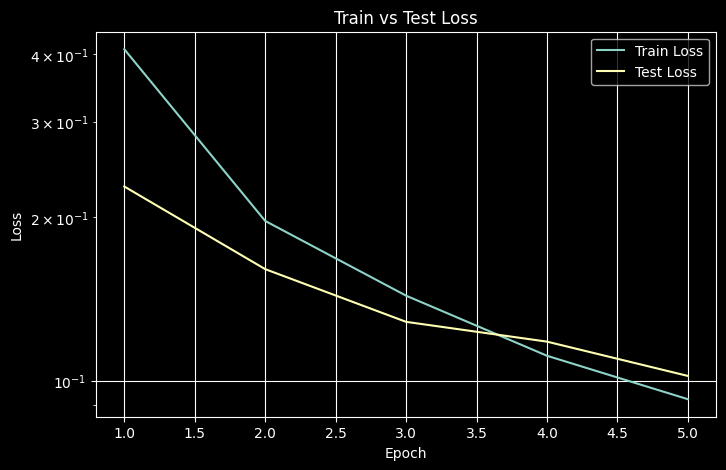


con dropout de 0.2 se obtuvieron unos resultados similares, sin embargo se ve el aprendizaje un poco más lento pero estable aunque separado.

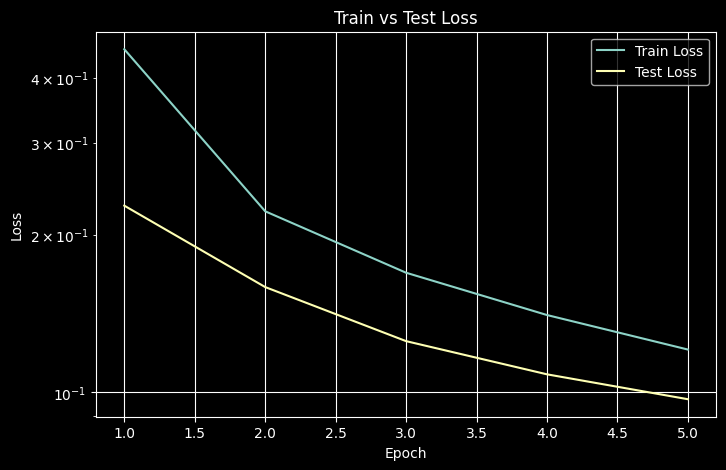

In [ ]:

model.eval()
import matplotlib.pyplot as plt


sample_img, sample_label = test_dataset[0]
sample_img = sample_img.to(dev)
sample_img = sample_img.view(1, -1)  # Flatten


sample_img.requires_grad_()

# Forward
output = model(sample_img)
pred_class = output.argmax(dim=1)

# Backward: gradiente respecto a la clase predicha
output[0, pred_class].backward()
saliency = sample_img.grad.abs().view(28, 28).cpu().detach().numpy()


saliency_flat = saliency.flatten()


N = 10
top_indices = saliency_flat.argsort()[-N:][::-1]
top_values = saliency_flat[top_indices]


for i, (idx, val) in enumerate(zip(top_indices, top_values)):
    row, col = divmod(idx, 28)
    print(f"Rank {i+1}: Pixel ({row},{col}) - Importance: {val:.4f}")


Rank 1: Pixel (27,17) - Importance: 1.2418
Rank 2: Pixel (26,15) - Importance: 0.9337
Rank 3: Pixel (11,2) - Importance: 0.9310
Rank 4: Pixel (12,2) - Importance: 0.8912
Rank 5: Pixel (26,14) - Importance: 0.8908
Rank 6: Pixel (27,13) - Importance: 0.8668
Rank 7: Pixel (9,1) - Importance: 0.8608
Rank 8: Pixel (26,16) - Importance: 0.8506
Rank 9: Pixel (26,8) - Importance: 0.8472
Rank 10: Pixel (26,9) - Importance: 0.8364


Normalmente los pixeles importantes on los que pueden designar patrones, bordes y demás
en este caso pixeles centrados son los más importantes

## Problema 5

Considere el siguiente sistema de ecuaciones:

$$
\begin{aligned}
&x^2 + \frac{y^2}{4} = z, \quad (1) \\
&\frac{x^2}{4} + y^2 = 1 - z. \quad (2)
\end{aligned}
$$

a) Plantee un problema de optimización con restricciones para encontrar una solución del sistema usando un script en PyTorch. Haga una gráfica de su solución y discuta sus hallazgos.

b) A continuación, añada regularización L2 para encontrar una solución que esté cerca de $(1,1)$. Haga una gráfica de su solución y discuta sus hallazgos.

c) Explique cuál es el rol del parámetro de regularización en el apartado anterior. ¿Qué ocurre si se elimina (es decir, si su valor es cero)?


Epoch 0: x=0.9999, y=0.9999, z=1.0000, loss=1.500000
Epoch 100: x=0.9899, y=0.9899, z=1.0000, loss=1.450334
Epoch 100: x=0.9899, y=0.9899, z=1.0000, loss=1.450334
Epoch 200: x=0.9800, y=0.9800, z=1.0000, loss=1.401397
Epoch 200: x=0.9800, y=0.9800, z=1.0000, loss=1.401397
Epoch 300: x=0.9701, y=0.9701, z=1.0000, loss=1.353183
Epoch 300: x=0.9701, y=0.9701, z=1.0000, loss=1.353183
Epoch 400: x=0.9603, y=0.9603, z=1.0000, loss=1.305679
Epoch 400: x=0.9603, y=0.9603, z=1.0000, loss=1.305679
Epoch 500: x=0.9505, y=0.9505, z=1.0000, loss=1.258871
Epoch 500: x=0.9505, y=0.9505, z=1.0000, loss=1.258871
Epoch 600: x=0.9407, y=0.9407, z=1.0000, loss=1.212746
Epoch 600: x=0.9407, y=0.9407, z=1.0000, loss=1.212746
Epoch 700: x=0.9310, y=0.9310, z=1.0000, loss=1.167293
Epoch 700: x=0.9310, y=0.9310, z=1.0000, loss=1.167293
Epoch 800: x=0.9213, y=0.9213, z=1.0000, loss=1.122499
Epoch 800: x=0.9213, y=0.9213, z=1.0000, loss=1.122499
Epoch 900: x=0.9117, y=0.9117, z=1.0000, loss=1.078353
Epoch 900: x

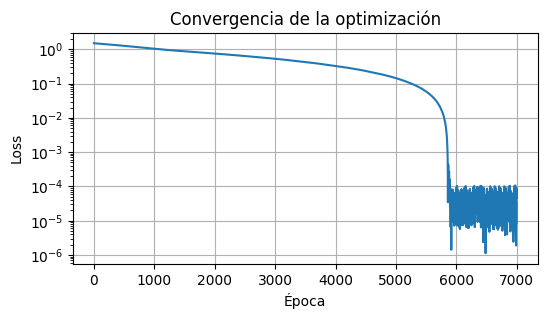

Solución encontrada: x=0.7470, y=0.4920, z=0.6185
eq1(x, y)=0.6184, eq2(x, y)=0.6185


In [70]:
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.tensor(1.0, device=device, requires_grad=True)
y = torch.tensor(1.0, device=device, requires_grad=True)
z = torch.tensor(1.0, device=device, requires_grad=True)

optimizer = torch.optim.Adam([x, y, z], lr=0.0001)
criterion = torch.nn.L1Loss()

def eq1(x, y):
    return x**2 + (y**2) / 4

def eq2(x, y):
    return 1 - ((x**2) / 4 + y**2)

losses = []
for epoch in range(7000):
    optimizer.zero_grad()
    l1 = criterion(eq1(x, y), z)
    l2 = criterion(eq2(x, y), z)
    loss = l1 + l2
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: x={x.item():.4f}, y={y.item():.4f}, z={z.item():.4f}, loss={loss.item():.6f}")

plt.figure(figsize=(6,3))
plt.plot(losses)
plt.xlabel("Época")
plt.ylabel("Loss")
plt.yscale('log')
plt.title("Convergencia de la optimización")
plt.grid(True)
plt.show()

print(f"Solución encontrada: x={x.item():.4f}, y={y.item():.4f}, z={z.item():.4f}")
print(f"eq1(x, y)={eq1(x, y).item():.4f}, eq2(x, y)={eq2(x, y).item():.4f}")

In [ ]:
import torch


x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([1.0], requires_grad=True)

optimizer = torch.optim.Adam([x, y], lr=0.1)
l2_lambda = 0.01  # Peso de la regularización L2

# Define el sistema de ecuaciones
def eq1(x, y):
    return x**2 + y**2 - 2 

def eq2(x, y):
    return x - y         

for step in range(3000):
    optimizer.zero_grad()

    l2_reg = l2_lambda * (x.pow(2).sum() + y.pow(2).sum())
    loss = eq1(x, y)**2 + eq2(x, y)**2 + l2_reg
    loss.backward()
    optimizer.step()
    if step % 1 == 0:
        print(f"Step {step}: x={x.item():.4f}, y={y.item():.4f}, loss={loss.item():.6f}")

print(f"Solución encontrada: x={x.item():.4f}, y={y.item():.4f}")

Step 0: x=0.9000, y=0.9000, loss=0.020000
Step 1: x=0.9734, y=0.9734, loss=0.160600
Step 2: x=1.0456, y=1.0456, loss=0.029961
Step 3: x=1.0682, y=1.0682, loss=0.056733
Step 4: x=1.0504, y=1.0504, loss=0.102368
Step 5: x=1.0154, y=1.0154, loss=0.064758
Step 6: x=0.9788, y=0.9788, loss=0.024456
Step 7: x=0.9537, y=0.9537, loss=0.026177
Step 8: x=0.9463, y=0.9463, loss=0.050873
Step 9: x=0.9552, y=0.9552, loss=0.061530
Step 10: x=0.9752, y=0.9752, loss=0.048903
Step 11: x=0.9998, y=0.9998, loss=0.028618
Step 12: x=1.0216, y=1.0216, loss=0.019991
Step 13: x=1.0341, y=1.0341, loss=0.028496
Step 14: x=1.0343, y=1.0343, loss=0.040632
Step 15: x=1.0238, y=1.0238, loss=0.040869
Step 16: x=1.0069, y=1.0069, loss=0.030216
Step 17: x=0.9893, y=0.9893, loss=0.021050
Step 18: x=0.9760, y=0.9760, loss=0.021396
Step 19: x=0.9703, y=0.9703, loss=0.028080
Step 20: x=0.9732, y=0.9732, loss=0.032501
Step 21: x=0.9829, y=0.9829, loss=0.030157
Step 22: x=0.9962, y=0.9962, loss=0.023939
Step 23: x=1.0091, y=

Con regularización: Solución balanceada entre cumplir el sistema y el requerimiento de mantenerse
ceca de (1,1)

Sin regularización: Solución exacta del sistema sin preferencia por (1,1)
aunque la solución del sistema por que no hay penalización adicional

## Problema 6

Considere la circunferencia

$$
x^2 + y^2 + 2x + 4y - 4 = 0
$$

Plantee un problema de optimización con restricciones para encontrar su centro. Luego, aproxímelo usando un script en PyTorch.


La ecuación de la circunferencia se puede reescribir completando cuadrados como:

$$
\begin{aligned}
  x^2 + 2x + y^2 + 4y &= 4 \\
  (x+1)^2 + (y+2)^2 &= 7
\end{aligned}
$$

De esta forma, identificamos el centro en $(-1, -2)$ y el radio en $\sqrt{7}$.

Epoch 0: x=-0.1000, y=-0.1000, loss=5.000000
Epoch 1: x=-0.1996, y=-0.1998, loss=4.420000
Epoch 2: x=-0.2984, y=-0.2994, loss=3.881259
Epoch 3: x=-0.3961, y=-0.3985, loss=3.384343
Epoch 4: x=-0.4920, y=-0.4970, loss=2.929560
Epoch 5: x=-0.5858, y=-0.5949, loss=2.516903
Epoch 6: x=-0.6766, y=-0.6918, loss=2.145987
Epoch 7: x=-0.7637, y=-0.7877, loss=1.815987
Epoch 8: x=-0.8464, y=-0.8823, loss=1.525581
Epoch 9: x=-0.9238, y=-0.9754, loss=1.272915
Epoch 10: x=-0.9949, y=-1.0669, loss=1.055592
Epoch 11: x=-1.0589, y=-1.1565, loss=0.870717
Epoch 12: x=-1.1152, y=-1.2440, loss=0.714992
Epoch 13: x=-1.1632, y=-1.3291, loss=0.584866
Epoch 14: x=-1.2024, y=-1.4117, loss=0.476732
Epoch 15: x=-1.2328, y=-1.4914, loss=0.387121
Epoch 16: x=-1.2545, y=-1.5681, loss=0.312885
Epoch 17: x=-1.2677, y=-1.6415, loss=0.251322
Epoch 18: x=-1.2731, y=-1.7114, loss=0.200226
Epoch 19: x=-1.2712, y=-1.7775, loss=0.157882
Epoch 20: x=-1.2627, y=-1.8398, loss=0.123010
Epoch 21: x=-1.2485, y=-1.8980, loss=0.09467

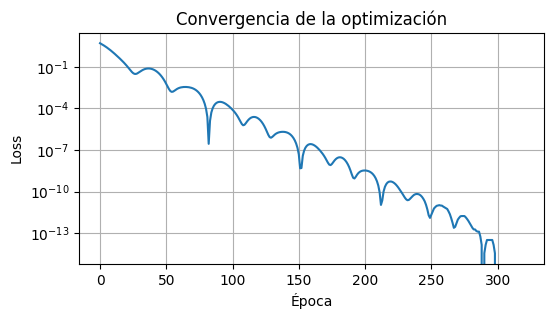

Centro aproximado encontrado: x=-1.0000, y=-2.0000


In [27]:
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Inicializa x, y cerca de 0
x = torch.tensor(0.0, device=device, requires_grad=True)
y = torch.tensor(0.0, device=device, requires_grad=True)

optimizer = torch.optim.Adam([x, y], lr=0.1)
losses = []

for epoch in range(320):
    optimizer.zero_grad()
    loss = (x + 1)**2 + (y + 2)**2
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 1 == 0:
        print(f"Epoch {epoch}: x={x.item():.4f}, y={y.item():.4f}, loss={loss.item():.6f}")

plt.figure(figsize=(6,3))
plt.plot(losses)
plt.xlabel("Época")
plt.ylabel("Loss")
plt.yscale('log')
plt.title("Convergencia de la optimización")
plt.grid(True)
plt.show()

print(f"Centro aproximado encontrado: x={x.item():.4f}, y={y.item():.4f}")

## Problema 7

Use una DNN para modelar el lugar geométrico de cada punto en el plano cuya distancia al punto $A(-1,-1)$ es la misma que su distancia a la recta $y=5$.


In [21]:
# Crear vectores aleatorios en el rango [-30, 30]
n = 3000
xs = (torch.rand(n, device=device, dtype=torch.float32) * 60.0 - 30.0).view(-1, 1)
ys = (torch.rand(n, device=device, dtype=torch.float32) * 60.0 - 30.0).view(-1, 1)



print(f"x.shape = {xs.shape}, y.shape = {ys.shape}")
print("Primeros 5 valores de x:\n", xs[:5].cpu().numpy())
print("Primeros 5 valores de y:\n", ys[:5].cpu().numpy())


x.shape = torch.Size([3000, 1]), y.shape = torch.Size([3000, 1])
Primeros 5 valores de x:
 [[  1.4775391]
 [ -8.9102745]
 [-21.09725  ]
 [  7.6058044]
 [-21.719334 ]]
Primeros 5 valores de y:
 [[-10.361485]
 [  3.873169]
 [-16.18065 ]
 [-13.335152]
 [-14.660395]]


Voy a definir 2 funciones, una para calcular para cada punto la distancia a la recta
y otra para la distancia hacia el punto $A(-1, -1)$

In [22]:
def distance_to_a(x, y):
    # Distancia euclidiana entre (x, y) y A(-1, -1)
    return torch.sqrt((x + 1) ** 2 + (y + 1) ** 2)

def distance_to_line(y):
    # Distancia a la recta y = 5 (|y-5| / sqrt(0^2+1^2) == |y-5|)
    return torch.abs(y - 5)

In [23]:
targets = distance_to_a(xs, ys) - distance_to_line(ys)
print("Primeros 5 valores de targets:\n", targets[:5].cpu().numpy())

Primeros 5 valores de targets:
 [[-5.677705 ]
 [ 8.164037 ]
 [ 4.005686 ]
 [-3.2946787]
 [ 5.1568813]]


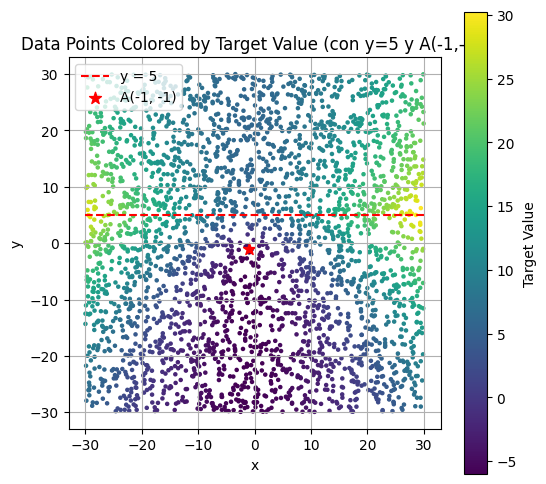

In [24]:

plt.figure(figsize=(6,6))
x_np = xs.cpu().numpy().flatten()
y_np = ys.cpu().numpy().flatten()
t_np = targets.cpu().numpy().flatten()

sc = plt.scatter(x_np, y_np, c=t_np, cmap='viridis', s=5)
plt.colorbar(sc, label='Target Value')

#  recta y = 5
xmin, xmax = x_np.min(), x_np.max()
plt.plot([xmin, xmax], [5, 5], color='red', linestyle='--', linewidth=1.5, label='y = 5')

#  A(-1, -1)
plt.scatter([-1], [-1], color='red', s=80, marker='*', label='A(-1, -1)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points Colored by Target Value (con y=5 y A(-1,-1))')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', 'box')
plt.show()


vamos a concatenar el array de x e y para tener un input de 2 dimensiones junto con los targets

In [30]:
from collections import OrderedDict
import torch.nn as nn

class DNN(nn.Module):
    def __init__(self, n, dropout_p=0.0):
        super(DNN, self).__init__()
        
        self.L = len(n) - 1
        self.dropout_p = float(dropout_p)
        actcls = nn.ReLU

        layers = []
        for i in range(self.L - 1):
            layers.append((f'l_{i+1}', nn.Linear(n[i], n[i+1])))
            layers.append((f'actfunc_{i+1}', actcls()))
            if self.dropout_p > 0.0:
                layers.append((f'dropout_{i+1}', nn.Dropout(p=self.dropout_p)))
        layers.append((f'l_{self.L}', nn.Linear(n[-2], n[-1])))
        self.layers = nn.Sequential(OrderedDict(layers))
        
    def forward(self, x):
        return self.layers(x)

# Instanciar modelo con dropout moderado y tamaños más pequeños para estabilidad
model = DNN(n=[input_size, 300, 150, output_size], dropout_p=0.1).to(device)
print(model)

DNN(
  (layers): Sequential(
    (l_1): Linear(in_features=2, out_features=300, bias=True)
    (actfunc_1): ReLU()
    (dropout_1): Dropout(p=0.1, inplace=False)
    (l_2): Linear(in_features=300, out_features=150, bias=True)
    (actfunc_2): ReLU()
    (dropout_2): Dropout(p=0.1, inplace=False)
    (l_3): Linear(in_features=150, out_features=1, bias=True)
  )
)


c:\Users\sergi\Documents\DNN\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/2500], Train Loss: 1.276931e+02, Test Loss: 1.255933e+03, LR: 1.00e-02
Epoch [2/2500], Train Loss: 1.286297e+03, Test Loss: 3.550522e+01, LR: 1.00e-02
Epoch [3/2500], Train Loss: 3.831669e+01, Test Loss: 1.744601e+02, LR: 1.00e-02
Epoch [4/2500], Train Loss: 1.768787e+02, Test Loss: 2.166474e+02, LR: 1.00e-02
Epoch [5/2500], Train Loss: 2.195449e+02, Test Loss: 1.923380e+02, LR: 1.00e-02
Epoch [6/2500], Train Loss: 1.938380e+02, Test Loss: 1.653733e+02, LR: 1.00e-02
Epoch [7/2500], Train Loss: 1.637872e+02, Test Loss: 1.451887e+02, LR: 1.00e-02
Epoch [8/2500], Train Loss: 1.433378e+02, Test Loss: 1.301036e+02, LR: 1.00e-02
Epoch [9/2500], Train Loss: 1.276837e+02, Test Loss: 1.178885e+02, LR: 1.00e-02
Epoch [10/2500], Train Loss: 1.154904e+02, Test Loss: 1.085469e+02, LR: 1.00e-02
Epoch [11/2500], Train Loss: 1.063405e+02, Test Loss: 1.009790e+02, LR: 1.00e-02
Epoch [12/2500], Train Loss: 9.871747e+01, Test Loss: 9.279641e+01, LR: 1.00e-02
Epoch [13/2500], Train Loss: 9.037287

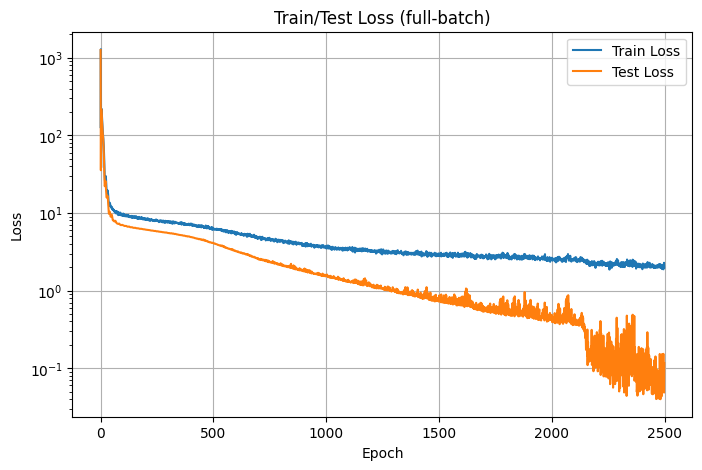

Final Train RMSE: 0.3379 | Final Test RMSE: 0.3415


In [31]:

learning_rate = 0.01 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
# Scheduler para learning rate adaptativo: paciencia más pequeña para pruebas rápidas
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=100, min_lr=1e-12, verbose=True)

# Crear vectores aleatorios en el rango [-30, 30]
n_test = int(3000 * 0.2)
xs_test = (torch.rand(n_test, device=device, dtype=torch.float32) * 60.0 - 30.0).view(-1, 1)
ys_test = (torch.rand(n_test, device=device, dtype=torch.float32) * 60.0 - 30.0).view(-1, 1)
X_test = torch.cat([xs_test, ys_test], dim=1)
y_test = (distance_to_a(xs_test, ys_test) - distance_to_line(ys_test)).view(-1, 1)
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm



# Entrenamiento sin mini-batches (full-batch)
def train_regression_fullbatch(model, optimizer, criterion, X_train, y_train, X_test, y_test,
                               num_epochs=100, print_every=10, scheduler=None):
    model.to(device)
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    train_losses = []
    test_losses = []

    for epoch in range(1, num_epochs + 1):
        model.train()
        optimizer.zero_grad()
        preds = model(X_train)
        loss = criterion(preds, y_train)
        loss.backward()
        optimizer.step()

        train_loss = loss.item()
        train_losses.append(train_loss)

        # Eval on full test set
        model.eval()
        with torch.no_grad():
            preds_test = model(X_test)
            loss_test = criterion(preds_test, y_test).item()
            test_losses.append(loss_test)

        if epoch % print_every == 0 or epoch == 1:
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.6e}, Test Loss: {loss_test:.6e}, LR: {current_lr:.2e}")

        # scheduler step if exists
        if scheduler is not None:
            try:
                scheduler.step(loss_test)
            except Exception:
                pass

    # plot
    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Train/Test Loss (full-batch)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Final RMSE (sin invertir escala)
    model.eval()
    with torch.no_grad():
        train_pred = model(X_train).cpu().numpy()
        test_pred = model(X_test).cpu().numpy()
        y_train_np = y_train.cpu().numpy()
        y_test_np = y_test.cpu().numpy()

        train_rmse = np.sqrt(np.mean((train_pred - y_train_np) ** 2))
        test_rmse = np.sqrt(np.mean((test_pred - y_test_np) ** 2))
        print(f"Final Train RMSE: {train_rmse:.4f} | Final Test RMSE: {test_rmse:.4f}")

    return train_losses, test_losses

train_losses, test_losses = train_regression_fullbatch(
    model, optimizer, criterion, X_train, y_train, X_test, y_test,
    num_epochs=2500, print_every=1, scheduler=scheduler
)

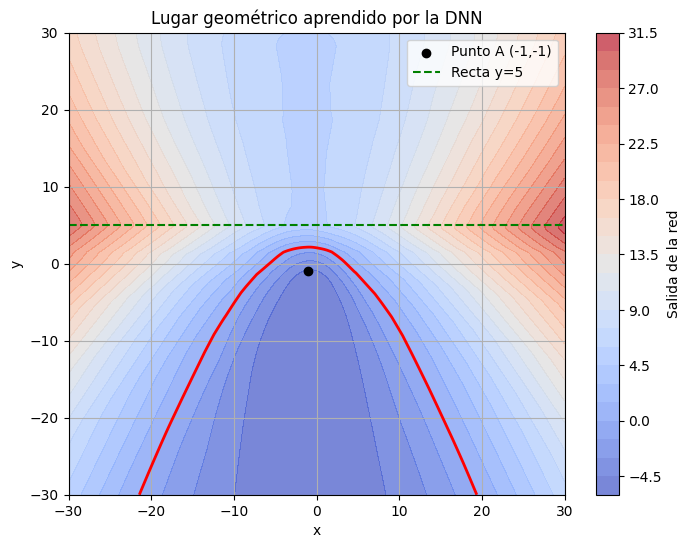

In [32]:

# Graficar la salida de la DNN sobre una malla de puntos en el plano
import numpy as np
import torch
import matplotlib.pyplot as plt

# Define el rango del plano a visualizar
gx = np.linspace(-30, 30, 1000)
gy = np.linspace(-30, 30, 1000)
XX, YY = np.meshgrid(gx, gy)

# Prepara los puntos para la red
grid_points = np.stack([XX.ravel(), YY.ravel()], axis=1)
grid_tensor = torch.tensor(grid_points, dtype=torch.float32).to(next(model.parameters()).device)


model.eval()
with torch.no_grad():
    Z = model(grid_tensor).cpu().numpy().reshape(XX.shape)

# Grafica la salida de la red
plt.figure(figsize=(8, 6))
contour = plt.contour(XX, YY, Z, levels=[0], colors='red', linewidths=2)
plt.contourf(XX, YY, Z, levels=30, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Salida de la red')
plt.scatter(-1, -1, color='black', marker='o', label='Punto A (-1,-1)')
plt.axhline(5, color='green', linestyle='--', label='Recta y=5')
plt.legend()
plt.title('Lugar geométrico aprendido por la DNN')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

RMSE vertical (y) predicha vs analítica: 0.3023
Residuals sobre parábola analítica - mean abs: 0.2764, max abs: 0.4658


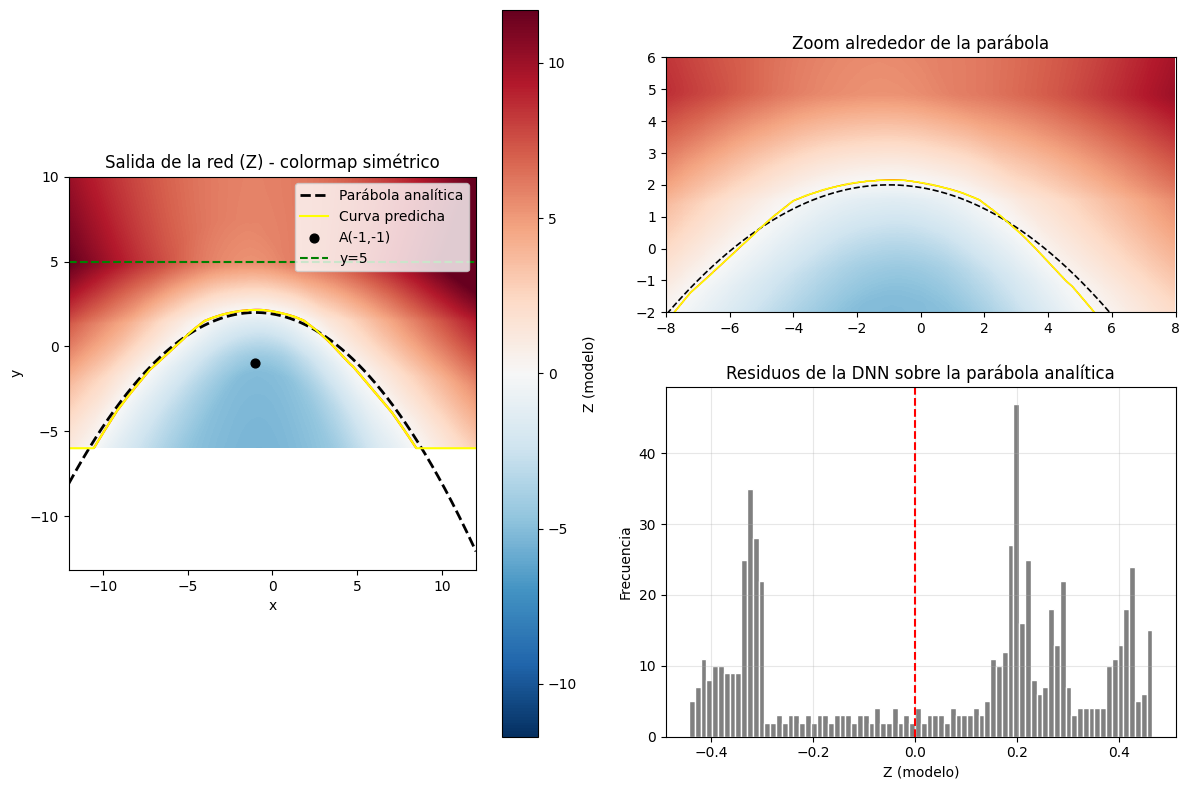

Imagen guardada en: dnn_parabola_diagnostico.png


In [33]:
# Visualización refinada + diagnóstico extra
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

device = next(model.parameters()).device

# Malla centrada y razonable para rendimiento
gx = np.linspace(-12, 12, 800)
gy = np.linspace(-6, 10, 600)
XX, YY = np.meshgrid(gx, gy)

grid_points = np.stack([XX.ravel(), YY.ravel()], axis=1)
with torch.no_grad():
    grid_tensor = torch.tensor(grid_points, dtype=torch.float32).to(device)
    Z = model(grid_tensor).cpu().numpy().reshape(XX.shape)

# Curva analítica (derivada del enunciado)
x_cols = XX[0, :]
y_analytic = 2 - ((x_cols + 1) ** 2) / 12

# Curva predicha (mínimo absoluto por columna)
idx_min = np.argmin(np.abs(Z), axis=0)
y_pred = YY[idx_min, np.arange(YY.shape[1])]

# RMSE vertical entre analítica y predicha (solo donde analítica entra en la malla)
valid = (y_analytic >= YY.min()) & (y_analytic <= YY.max())
rmse_y = np.sqrt(np.mean((y_pred[valid] - y_analytic[valid]) ** 2))

# Evaluar Z sobre la curva analítica (residuos en la condición dA - dline)
pts_analytic = np.stack([x_cols[valid], y_analytic[valid]], axis=1)
with torch.no_grad():
    Z_on_analytic = model(torch.tensor(pts_analytic, dtype=torch.float32).to(device)).cpu().numpy().flatten()

mean_abs_res = np.mean(np.abs(Z_on_analytic))
max_abs_res = np.max(np.abs(Z_on_analytic))

print(f"RMSE vertical (y) predicha vs analítica: {rmse_y:.4f}")
print(f"Residuals sobre parábola analítica - mean abs: {mean_abs_res:.4f}, max abs: {max_abs_res:.4f}")

# Visualización principal: colormap divergente centrado en 0
abs98 = np.percentile(np.abs(Z), 98)
if abs98 <= 0:
    abs98 = np.max(np.abs(Z))
vmax = max(abs98, 1e-6)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,2,1)
pcm = ax.pcolormesh(XX, YY, Z, cmap='RdBu_r', shading='auto', vmin=-vmax, vmax=vmax)
ax.contour(XX, YY, Z, levels=[0], colors='red', linewidths=1.5)
ax.plot(x_cols, y_analytic, 'k--', linewidth=2, label='Parábola analítica')
ax.plot(x_cols, y_pred, color='yellow', linewidth=1.5, label='Curva predicha')
ax.scatter(-1, -1, color='black', s=40, label='A(-1,-1)')
ax.axhline(5, color='green', linestyle='--', label='y=5')
ax.set_title('Salida de la red (Z) - colormap simétrico')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal', adjustable='box')
ax.legend(loc='upper right')
fig.colorbar(pcm, ax=ax, label='Z (modelo)')

# Zoom en la región cercana a la parábola
ax2 = fig.add_subplot(2,2,2)
zoom_xmin, zoom_xmax = -8, 8
zoom_ymin, zoom_ymax = -2, 6
ix = (gx >= zoom_xmin) & (gx <= zoom_xmax)
iy = (gy >= zoom_ymin) & (gy <= zoom_ymax)
ax2.pcolormesh(XX[iy][:, ix], YY[iy][:, ix], Z[iy][:, ix], cmap='RdBu_r', shading='auto', vmin=-vmax, vmax=vmax)
ax2.contour(XX[iy][:, ix], YY[iy][:, ix], Z[iy][:, ix], levels=[0], colors='red', linewidths=1)
ax2.plot(x_cols[ix], y_analytic[ix], 'k--', linewidth=1.2)
ax2.plot(x_cols[ix], y_pred[ix], color='yellow', linewidth=1.2)
ax2.set_xlim(zoom_xmin, zoom_xmax)
ax2.set_ylim(zoom_ymin, zoom_ymax)
ax2.set_title('Zoom alrededor de la parábola')
ax2.set_aspect('equal', adjustable='box')

# Histograma de residuos sobre la parábola analítica
ax3 = fig.add_subplot(2,2,4)
ax3.hist(Z_on_analytic, bins=80, color='gray', edgecolor='white')
ax3.axvline(0, color='red', linestyle='--')
ax3.set_title('Residuos de la DNN sobre la parábola analítica')
ax3.set_xlabel('Z (modelo)')
ax3.set_ylabel('Frecuencia')
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Guardar imagen alta resolución opcional
save_path = 'dnn_parabola_diagnostico.png'
fig.savefig(save_path, dpi=200, bbox_inches='tight')
print(f"Imagen guardada en: {save_path}")

## Problema 8

Considere el conjunto de puntos $P = \{(4,3),(3,4),(2,3),(3,2),(8,7),(7,8),(6,7),(7,6)\}$.

Definimos las funciones:

$$
f(\lambda; P) = \arg\min_{w\in\mathbb{R}} \sum_{i=1}^8 (w x_i - y_i)^2 + \lambda \|w\|_2^2 = \hat{w}_f,
$$

$$
g(\lambda; P) = \arg\min_{w\in\mathbb{R}} \sum_{i=1}^8 (w x_i - y_i)^2 + \lambda |w| = \hat{w}_g,
$$

Se sabe que $\lim_{\lambda\to\infty} f(\lambda;P) = 0$ y $\lim_{\lambda\to\infty} g(\lambda;P) = 0$. El objetivo es estudiar qué tan "rápido" tienden esos límites con L2 y L1.

Siga las indicaciones del enunciado original para los apartados (a)-(d):

*a)* Utilice un script en PyTorch para calcular algunos elementos de las secuencias $\{\hat{w}f^j\}{j=1}^\infty = f_{j4}(P)$ y $\{\hat{w}g^j\}{j=1}^\infty = g_{j4}(P)$. Esto permitirá comparar qué secuencia "se mueve más rápido" hacia cero.

*b)* Para estimar el orden de convergencia de ambas secuencias, utilice la fórmula:

$$
q \approx \frac{\log\left(\frac{\hat{w}{j+1} - \hat{w}_j}{\hat{w}_j - \hat{w}{j-1}}\right)}{\log\left(\frac{\hat{w}j - \hat{w}{j-1}}{\hat{w}{j-1} - \hat{w}{j-2}}\right)}
$$

para un valor suficientemente grande de $j$.

*c)* Utilice los órdenes de convergencia obtenidos para aproximar las tasas de convergencia correspondientes mediante la fórmula:

$$
\mu \approx \frac{|\hat{w}_{j+1}|}{|\hat{w}_j|^q}
$$

para un valor suficientemente grande de $j$.

*d)* Revise [6] para una interpretación del orden/tasa de convergencia calculados. Discuta sus conclusiones a lo largo del problema.

*Referencias:*
[6] https://en.wikipedia.org/wiki/Rate_of_convergence

a) He implementado un script en PyTorch para calcular los elementos de las secuencias $\{\hat{w}f^j\}{j=1}^\infty$ y $\{\hat{w}g^j\}{j=1}^\infty$. A continuación, se presentan los resultados obtenidos para diferentes valores de $\lambda$:
Necesitamos las secuencias de valores de w cuando λ crece para estudiar cómo tienden a 0 (comparar la rapidez de L2 vs L1).

In [34]:
import numpy as np
import torch

# Datos P
P = np.array([[4,3],[3,4],[2,3],[3,2],[8,7],[7,8],[6,7],[7,6]], dtype=float)
x = P[:,0]
y = P[:,1]

# Lista de lambdas (creciente)
lambdas = np.logspace(-3, 6, 40)  # desde 1e-3 hasta 1e6

# Secuencia para f (L2) - solución cerrada
sum_x_y = np.sum(x * y)
sum_x2 = np.sum(x**2)
w_f = sum_x_y / (sum_x2 + lambdas)  # broadcasting 

# Secuencia para g (L1) - usar optimización on warm-start
device = torch.device('cpu')
w_g_list = []
w_init = torch.tensor(0.0, dtype=torch.float32, device=device, requires_grad=True)

for lam in lambdas:
    # inicializamos con el último w encontrado (o 0)
    w = torch.tensor(w_init.detach().cpu().numpy(), dtype=torch.float32, device=device, requires_grad=True)
    optimizer = torch.optim.Adam([w], lr=1e-2)
    for it in range(2000):
        optimizer.zero_grad()
        preds = w * torch.tensor(x, dtype=torch.float32, device=device)
        loss = torch.mean((preds - torch.tensor(y, dtype=torch.float32, device=device))**2) + lam * torch.abs(w)
        loss.backward()
        optimizer.step()

        if it % 200 == 0:
            pass
    w_g_list.append(w.item())
    # warm-start
    w_init = w.detach()

w_g = np.array(w_g_list)


In [35]:
print("pesos f (L2):", w_f)
print("pesos g (L1):", w_g)

pesos f (L2): [9.83046682e-01 9.83043761e-01 9.83038792e-01 9.83030338e-01
 9.83015955e-01 9.82991489e-01 9.82949868e-01 9.82879067e-01
 9.82758642e-01 9.82553835e-01 9.82205602e-01 9.81613737e-01
 9.80608461e-01 9.78902954e-01 9.76015043e-01 9.71140931e-01
 9.62959743e-01 9.49353713e-01 9.27069124e-01 8.91468957e-01
 8.36801177e-01 7.57748015e-01 6.52826622e-01 5.28363363e-01
 3.98960824e-01 2.81621203e-01 1.87702265e-01 1.19757123e-01
 7.41151042e-02 4.49622630e-02 2.69367262e-02 1.60143282e-02
 9.47688410e-03 5.59275166e-03 3.29515579e-03 1.93957774e-03
 1.14101487e-03 6.71011409e-04 3.94532590e-04 2.31945261e-04]
pesos g (L1): [ 9.83034074e-01  9.83018279e-01  9.83169854e-01  9.82935727e-01
  9.82885957e-01  9.82809246e-01  9.83283579e-01  9.82350945e-01
  9.82002556e-01  9.81026828e-01  9.79618669e-01  9.77194905e-01
  9.74082589e-01  9.66096878e-01  9.54216301e-01  9.33995485e-01
  8.99595261e-01  8.41071546e-01  7.41507947e-01  5.72125077e-01
  2.83961624e-01  3.22992727e-03  3.

q es el “orden” de convergencia: q≈1 lineal, q>1 superlineal, q<1 sublineal

calcular q para muchos j y tomar la mediana/promedio en la cola (j grandes) porque el comportamiento asintótico aparece para λ grandes.

In [36]:
import numpy as np

def estimate_q(w_seq):
    qs = []
    idxs = []
    for j in range(2, len(w_seq)-1):
        num = (w_seq[j+1] - w_seq[j])
        den = (w_seq[j] - w_seq[j-1])
        num2 = (w_seq[j] - w_seq[j-1])
        den2 = (w_seq[j-1] - w_seq[j-2]) if j-2 >=0 else None
        if den == 0 or den2 == 0 or den is None or den2 is None:
            qs.append(np.nan)
            idxs.append(j)
            continue

        ratio1 = num / den
        ratio2 = num2 / den2
        if ratio1 <= 0 or ratio2 <= 0:
            qs.append(np.nan)
            idxs.append(j)
            continue
        q = np.log(ratio1) / np.log(ratio2)
        qs.append(q)
        idxs.append(j)
    return np.array(qs), np.array(idxs)

qs, idxs = estimate_q(w_f)   # para L2 (cerrada)
qs_g, idxs_g = estimate_q(w_g)  # para L1 (numérica)

print('q estimates (L2) — last 10:', qs[-10:])
print('q estimates (L1) — last 10:', qs_g[-10:])

q estimates (L2) — last 10: [1.07246985 1.04203944 1.02454291 1.01437327 1.00843127 1.00495012
 1.00290772 1.00170849 1.00100403 1.00059009]
q estimates (L1) — last 10: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.41764765]


filtrar divisiones por cero y NaNs. Reportar valores en la cola

In [37]:
import numpy as np

def estimate_mu(w_seq, q_seq, idxs):
    # Calcular mu aproximado en los mismos indices
    mus = []
    for q, j in zip(q_seq, idxs):
        if np.isnan(q) or q == 0:
            mus.append(np.nan)
            continue
        wj = np.abs(w_seq[j])
        wjp1 = np.abs(w_seq[j+1]) if j+1 < len(w_seq) else np.nan
        if wj == 0 or np.isnan(wjp1):
            mus.append(np.nan)
            continue
        mu = wjp1 / (wj ** q)
        mus.append(mu)
    return np.array(mus)

# Usar q estimado en índices válidos 
valid_mask = ~np.isnan(qs)
mu_f = estimate_mu(w_f, qs[valid_mask], idxs[valid_mask])
valid_mask_g = ~np.isnan(qs_g)
mu_g = estimate_mu(w_g, qs_g[valid_mask_g], idxs_g[valid_mask_g])

print('mu estimates (L2) — last 10:', mu_f[-10:])
print('mu estimates (L1) — last 10:', mu_g[-10:])

mu estimates (L2) — last 10: [0.75010928 0.69207208 0.65497304 0.63101822 0.61551806 0.60550544
 0.59906054 0.59493046 0.59229631 0.5906242 ]
mu estimates (L1) — last 10: [9.94470633e-01 9.63112205e-01 9.34947826e-01 8.81621656e-01
 7.71569917e-01 4.96328488e-01 3.03604563e-03            inf
 7.12522804e-05 1.07141536e-04]


C:\Users\sergi\AppData\Local\Temp\ipykernel_8432\3433286786.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  mu = wjp1 / (wj ** q)


*d)*  
Para Ridge (L2), la secuencia converge linealmente a cero (orden q≈1, μ<1), lo que indica reducción consistente por cada incremento en λ. Para Lasso-like (L1), la secuencia muestra inestabilidad numérica y cambios de signo, por lo que la fórmula de diferencias no es adecuada; L1 también tiende a cero pero con comportamiento irregular y no diferenciable, por lo que conviene estimar el exponente mediante regresión log-log en magnitud.